In [25]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import math

import matplotlib.pyplot as plt
%matplotlib inline

# Set style & figures inline
sns.set()
%matplotlib inline

In [2]:
time_series = pd.read_csv("/content/time_series_covid19_confirmed_global.csv")
time_series.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074,39096,39145,39170,39186,39192
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535,12666,12787,12921,13045,13153
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023,50214,50400,50579,50754,50914
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681,1681,1753,1753,1836,1836
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117,4236,4363,4475,4590,4672
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,93,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,96,96,96,96,97,97,98,98
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,305966,312659,320884,329043,336802,342154,350867,359638,370188,380292,392009,401239,408426,417735,428239,439172,451198,461882,471806,478792,488007,500034,512293,524198,535705,546481,555537,565446,577338,589012,601713,613658,622934,631365,640147,652174,664799,678266,691235,702484
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,41846,42056,42319,42477,42616,42792,42825,42936,43067,43270,43451,43626,43750,43781,43878,44075,44271,44461,44649,44783,44845,44953,45152,45326,45503,45675,45862,45969,46119,46376,46671,46910,47154,47431,47552,47667,47877,48251,48643,49072
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,3966,3971,3972,3981,3985,3988,3991,3997,4006,4019,4033,4040,4050,4063,4079,4091,4099,4104,4114,4118,4126,4135,4142,4152,4157,4166,4170,4177,4185,4190,4196,4198,4200,4204,4206,4212,4213,4217,4218,4218


In [3]:
time_series.drop(['Lat','Long'], axis=1, inplace=True)
time_series.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074,39096,39145,39170,39186,39192
1,NaN,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535,12666,12787,12921,13045,13153
2,NaN,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023,50214,50400,50579,50754,50914
3,NaN,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681,1681,1753,1753,1836,1836
4,NaN,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117,4236,4363,4475,4590,4672
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,93,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,96,96,96,96,97,97,98,98
6,NaN,Argentina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,305966,312659,320884,329043,336802,342154,350867,359638,370188,380292,392009,401239,408426,417735,428239,439172,451198,461882,471806,478792,488007,500034,512293,524198,535705,546481,555537,565446,577338,589012,601713,613658,622934,631365,640147,652174,664799,678266,691235,702484
7,NaN,Armenia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,41846,42056,42319,42477,42616,42792,42825,42936,43067,43270,43451,43626,43750,43781,43878,44075,44271,44461,44649,44783,44845,44953,45152,45326,45503,45675,45862,45969,46119,46376,46671,46910,47154,47431,47552,47667,47877,48251,48643,49072
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,0,0,0,0,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,...,3966,3971,3972,3981,3985,3988,3991,3997,4006,4019,4033,4040,4050,4063,4079,4091,4099,4104,4114,4118,4126,4135,4142,4152,4157,4166,4170,4177,4185,4190,4196,4198,4200,4204,4206,4212,4213,4217,4218,4218


In [4]:

time_series_global = time_series.groupby(['Country/Region']).sum()
time_series_global.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074,39096,39145,39170,39186,39192
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535,12666,12787,12921,13045,13153
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,39444,39847,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023,50214,50400,50579,50754,50914
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1005,1024,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681,1681,1753,1753,1836,1836
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1966,2015,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117,4236,4363,4475,4590,4672
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,93,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,96,96,96,96,97,97,98,98
Argentina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,305966,312659,320884,329043,336802,342154,350867,359638,370188,380292,392009,401239,408426,417735,428239,439172,451198,461882,471806,478792,488007,500034,512293,524198,535705,546481,555537,565446,577338,589012,601713,613658,622934,631365,640147,652174,664799,678266,691235,702484
Armenia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,41846,42056,42319,42477,42616,42792,42825,42936,43067,43270,43451,43626,43750,43781,43878,44075,44271,44461,44649,44783,44845,44953,45152,45326,45503,45675,45862,45969,46119,46376,46671,46910,47154,47431,47552,47667,47877,48251,48643,49072
Australia,0,0,0,0,4,5,5,6,9,9,12,12,12,13,13,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,25,27,...,23989,24236,24407,24602,24811,24915,25053,25204,25322,25448,25547,25670,25746,25819,25923,26049,26136,26207,26278,26321,26373,26465,26524,26564,26607,26651,26692,26739,26778,26813,26861,26885,26898,26912,26942,26972,26980,27000,27016,27040


In [5]:
time_series_global = time_series_global.transpose()
time_series_global.columns.get_loc('Diamond Princess')

48

In [6]:
# Dropping Diamond Princess row since it is a Cruise Ship and not a Country
time_series_global.drop(['Diamond Princess'],axis=1, inplace= True)
time_series_global.head(10)

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0
1/27/20,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2877,0,0,0,...,0,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,5,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0
1/28/20,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,5509,0,0,0,...,0,0,0,0,7,0,0,0,0,0,0,1,0,0,0,0,0,8,0,0,14,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0
1/29/20,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,6087,0,0,0,...,0,0,0,0,7,0,0,0,0,0,0,1,0,0,0,0,0,8,0,0,14,0,0,0,0,0,6,0,0,4,0,0,0,0,2,0,0,0,0,0
1/30/20,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,8141,0,0,0,...,0,0,0,0,10,0,0,0,0,0,0,1,0,0,0,0,0,9,0,0,14,0,0,0,0,0,6,0,0,4,0,0,0,0,2,0,0,0,0,0
1/31/20,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,9802,0,0,0,...,0,0,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,10,0,0,19,0,0,0,0,0,8,0,0,4,2,0,0,0,2,0,0,0,0,0


In [7]:
time_series_global.index

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/17/20', '9/18/20', '9/19/20', '9/20/20', '9/21/20', '9/22/20',
       '9/23/20', '9/24/20', '9/25/20', '9/26/20'],
      dtype='object', length=249)

In [8]:
date_index = pd.DatetimeIndex(time_series_global.index)
time_series_global.set_index(date_index, inplace=True)
time_series_global.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-09-17', '2020-09-18', '2020-09-19', '2020-09-20',
               '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24',
               '2020-09-25', '2020-09-26'],
              dtype='datetime64[ns]', length=249, freq=None)

In [12]:
# Country having the highest confirmed cases in the World
time_series_global.idxmax(axis=1)[-1]

'US'

In [13]:
# Number of confirmed cases in the country having highest confirmed cases
sorted(time_series_global.max(), reverse = True)[0]

7078089

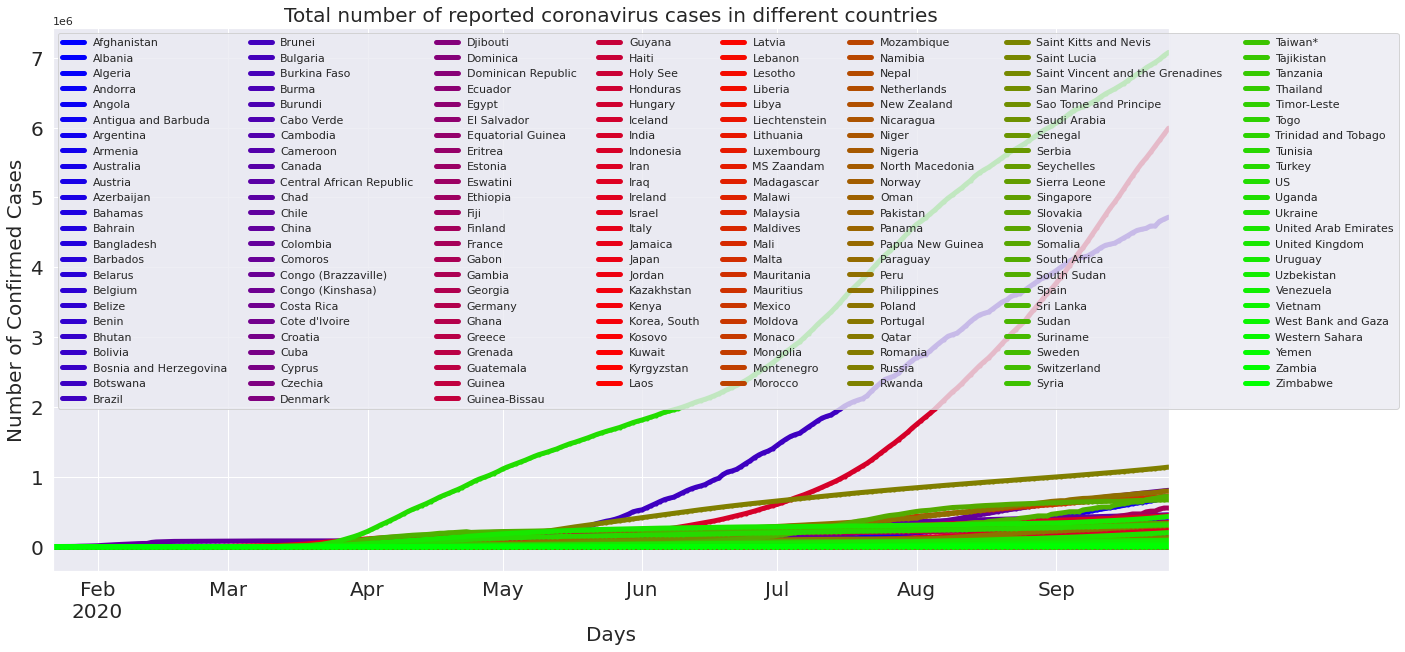

In [14]:
ax = time_series_global.plot(figsize=(20,10), linewidth=5, marker='.', colormap='brg', fontsize=20);
ax.legend(ncol=8, loc='upper left')
plt.xlabel('Days', fontsize=20);
plt.ylabel('Number of Confirmed Cases', fontsize=20);
plt.title('Total number of reported coronavirus cases in different countries', fontsize=20);

In [15]:
latest_counts = time_series_global.iloc[-1]

In [16]:
top_10 = latest_counts.sort_values(ascending=False)[:10]
top_10.index

Index(['US', 'India', 'Brazil', 'Russia', 'Colombia', 'Peru', 'Mexico',
       'Spain', 'Argentina', 'South Africa'],
      dtype='object', name='Country/Region')

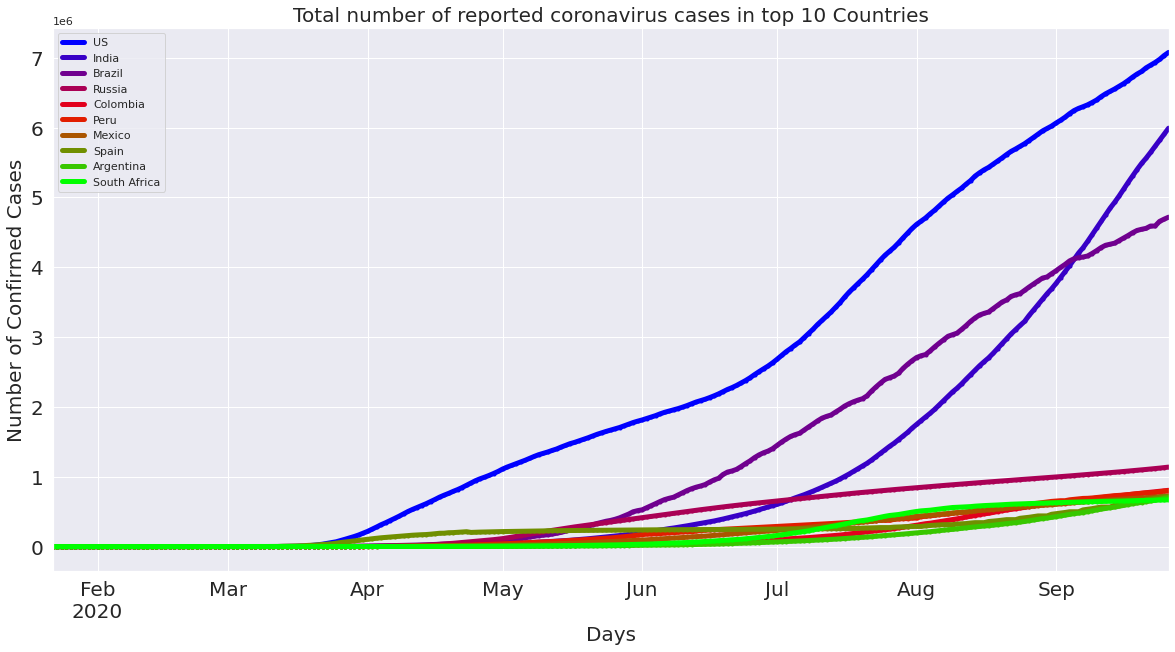

In [17]:
ax = time_series_global[top_10.index].plot(figsize=(20,10), linewidth=5, marker='.', colormap='brg', fontsize=20);
ax.legend(ncol=1, loc='upper left')
plt.xlabel('Days', fontsize=20);
plt.ylabel('Number of Confirmed Cases', fontsize=20);
plt.title('Total number of reported coronavirus cases in top 10 Countries', fontsize=20);

In [19]:
!pip install bar_chart_race
import bar_chart_race as bcr

     |████████████████████████████████| 163kB 2.8MB/s 


In [23]:
bcr.bar_chart_race(
    df=time_series_global,
    filename='covid19_all_countries.mp4',
    orientation='h',
    n_bars = 10,
    sort='desc',
    label_bars=True,
    steps_per_period=10,
    period_length=500,
    figsize=(6.5, 3.5),
    cmap='dark24',
    title='COVID-19 Confirmed Cases by Country',
    bar_label_size=7,
    tick_label_size=7,
    fig=None)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 132 missing from current font.
  font.set_text(s, 0.0,

**Checking Benford's Law on the available COVID-19 Dataset**

In [26]:
# expected number of each leading digit per Benford's law
benford = [math.log10(1 + 1./i) for i in range(1, 10)]
# benford = [0.5] + benford
benford

[0.3010299956639812,
 0.17609125905568124,
 0.12493873660829992,
 0.09691001300805642,
 0.07918124604762482,
 0.06694678963061322,
 0.05799194697768673,
 0.05115252244738129,
 0.04575749056067514]

In [27]:
total_cases = time_series_global

In [28]:
sorted(total_cases.max(), reverse = True)[0]

7078089

In [29]:
# Last row
latest_counts = total_cases.iloc[-1]

In [30]:
top_10 = latest_counts.sort_values(ascending=False)[:11]
top_10.index

Index(['US', 'India', 'Brazil', 'Russia', 'Colombia', 'Peru', 'Mexico',
       'Spain', 'Argentina', 'South Africa', 'France'],
      dtype='object', name='Country/Region')

In [33]:
req_countries = total_cases[top_10.index]
req_countries.head()

Country/Region,US,India,Brazil,Russia,Colombia,Peru,Mexico,Spain,Argentina,South Africa,France
2020-01-22,1,0,0,0,0,0,0,0,0,0,0
2020-01-23,1,0,0,0,0,0,0,0,0,0,0
2020-01-24,2,0,0,0,0,0,0,0,0,0,2
2020-01-25,2,0,0,0,0,0,0,0,0,0,3
2020-01-26,5,0,0,0,0,0,0,0,0,0,3


In [34]:
first_digits = {}
for row in req_countries.iterrows():
#     print(row[1])
    for col in row[1].iteritems():
        first_digit = int(str(col[1])[0])
        if first_digit == 0:
            continue
        if col[0] in first_digits.keys():
            if first_digit in first_digits[col[0]].keys():
                first_digits[col[0]][first_digit] += 1
            else:
                first_digits[col[0]][first_digit] = 1
        else:
            first_digits[col[0]] = {}
first_digits

{'Argentina': {1: 55, 2: 36, 3: 29, 4: 24, 5: 21, 6: 19, 7: 9, 8: 8, 9: 6},
 'Brazil': {1: 55, 2: 45, 3: 42, 4: 35, 5: 9, 6: 8, 7: 6, 8: 7, 9: 6},
 'Colombia': {1: 49, 2: 31, 3: 26, 4: 20, 5: 21, 6: 19, 7: 25, 8: 6, 9: 7},
 'France': {1: 105, 2: 70, 3: 22, 4: 16, 5: 12, 6: 11, 7: 4, 8: 2, 9: 4},
 'India': {1: 56, 2: 38, 3: 62, 4: 23, 5: 26, 6: 10, 7: 10, 8: 8, 9: 7},
 'Mexico': {1: 40, 2: 31, 3: 25, 4: 27, 5: 33, 6: 27, 7: 14, 8: 8, 9: 6},
 'Peru': {1: 40, 2: 37, 3: 31, 4: 24, 5: 17, 6: 24, 7: 21, 8: 5, 9: 5},
 'Russia': {1: 51, 2: 49, 3: 19, 4: 19, 5: 17, 6: 20, 7: 18, 8: 22, 9: 24},
 'South Africa': {1: 46, 2: 29, 3: 22, 4: 19, 5: 29, 6: 43, 7: 8, 8: 5, 9: 4},
 'Spain': {1: 35, 2: 129, 3: 23, 4: 17, 5: 11, 6: 13, 7: 5, 8: 3, 9: 2},
 'US': {1: 81, 2: 38, 3: 21, 4: 23, 5: 33, 6: 32, 7: 8, 8: 7, 9: 5}}

In [35]:
for k in first_digits.keys():
    total = sum(first_digits[k].values())
    first_digits[k] = {k: v / total for k, v in first_digits[k].items()}
    
# first_digits

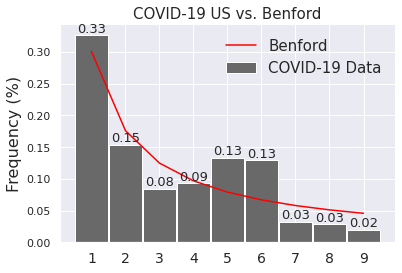

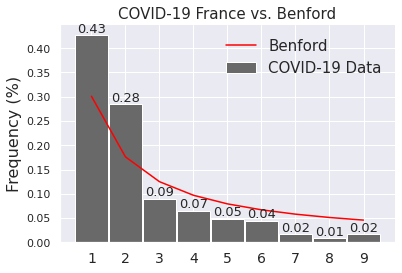

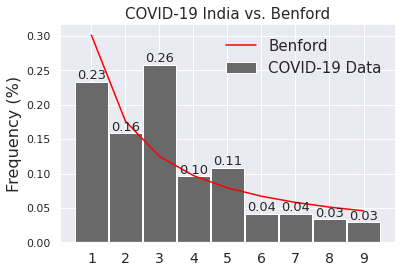

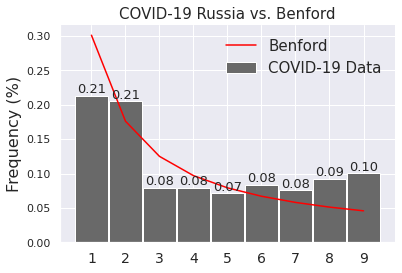

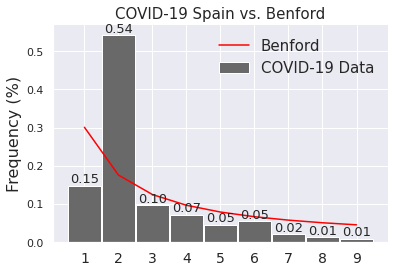

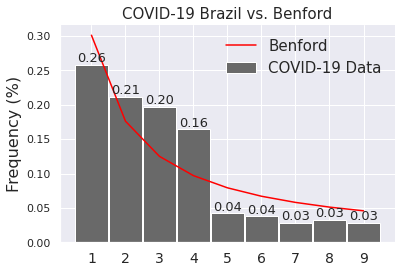

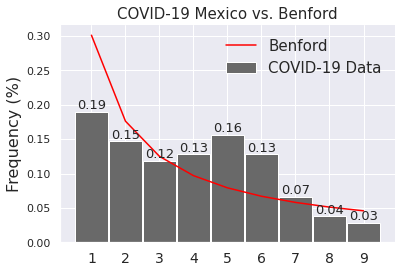

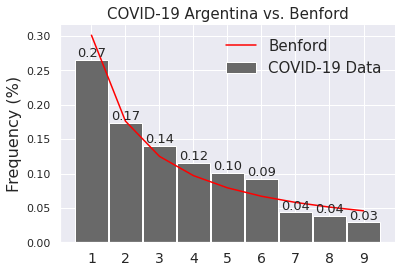

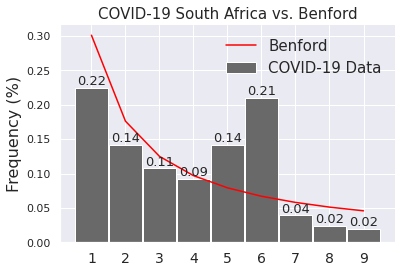

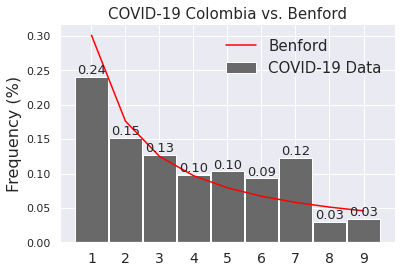

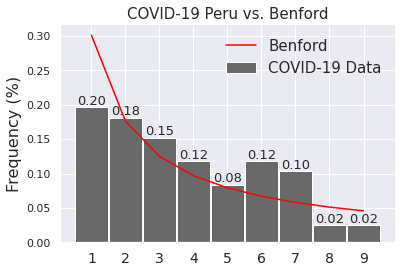

In [41]:
index = [i + 1 for i in range(9)]

for k in first_digits.keys():

    fig, ax = plt.subplots()

    fig.canvas.set_window_title('Percentage First Digits')
    ax.set_title('COVID-19 ' + k +' vs. Benford', fontsize=15)
    ax.set_ylabel('Frequency (%)', fontsize=16)
    ax.set_xticks(index)
    ax.set_xticklabels(index, fontsize=14)

    # build bars    
    rects = ax.bar(first_digits[k].keys(),first_digits[k].values(), width=0.95, color='dimgrey', label='COVID-19 Data')

    # attach a text label above each bar displaying its height
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height,
                '{:0.2f}'.format(height), ha='center', va='bottom', 
                fontsize=13)

    # plot Benford values as red curved line
    ax.plot(index, benford, c='red', zorder=2, label='Benford')

    # Hide the right and top spines & add legend
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend(prop={'size':15}, frameon=False)
    plt.show()
